In [ ]:
import numpy as np 
import pandas as pd 
import cv2
from tqdm import tqdm
import os
import matplotlib.pyplot as plt
from glob import glob

from keras.models import *
from keras.layers import *
from tensorflow.keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.activations import *

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_shape = (256,256)
def transform_img(img):
  img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  reshape_img = cv2.resize(img_gray,img_shape)
  return reshape_img/255.0

In [ ]:
model_prev = load_model('/content/drive/MyDrive/Covid_dataset/lung_seg.h5')

In [ ]:
def extest(temp_img,kernel=np.ones((5,5),np.uint8)):

  int_img = cv2.imread(temp_img)
  img = transform_img(int_img)

  mask = model_prev.predict(np.array([img]))

  img_f = np.squeeze(np.array([img]))
  
  plt.figure(figsize=(10,6))
  plt.subplot(1,4,1)
  plt.axis("off")
  plt.title('Original Image')
  plt.imshow(img_f,cmap ='gray')

  mask_f = np.squeeze(mask[0])
  
  plt.subplot(1,4,2)
  plt.axis("off")
  plt.title('Predicted Mask')
  plt.imshow(mask_f,cmap ='gray')

  _mask = (mask_f>0.5).astype(np.uint8)

  plt.subplot(1,4,3)
  plt.axis("off")
  plt.title('Clear Edge Mask')
  plt.imshow(_mask,cmap ='gray')

  aimg = cv2.bitwise_and(img_f,img_f,mask = _mask)
  plt.subplot(1,4,4)
  plt.axis("off")
  plt.title('Segmented lung')
  plt.imshow(aimg,cmap ='gray')

  plt.show()

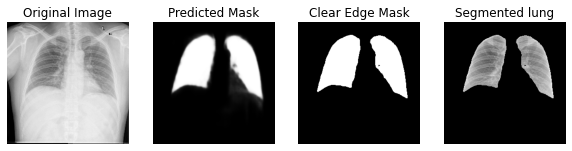

In [ ]:
extest('/content/drive/MyDrive/Lung Segmentation/CXR_png/CHNCXR_0013_0.png')

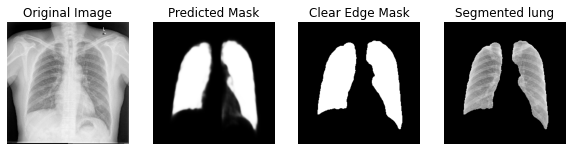

In [ ]:
extest('/content/drive/MyDrive/Lung Segmentation/test/CHNCXR_0191_0.png')

In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math

import keras
from keras import models
from keras import layers
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dense, Conv2D , SeparableConv2D, MaxPooling2D , Flatten , Dropout , BatchNormalization, Activation
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.callbacks import ReduceLROnPlateau 
from keras import backend as K
from keras import optimizers
from sklearn.metrics import classification_report, recall_score, precision_score, confusion_matrix, f1_score, accuracy_score
import tensorflow as tf

In [ ]:
train_data_dir = '/content/drive/MyDrive/Fine dataset/train/'
test_data_dir = '/content/drive/MyDrive/Fine dataset/test/'

In [ ]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        # zoom_range=0.4,
        validation_split=0.2
        )

train_gen = train_datagen.flow_from_directory(
        directory = train_data_dir,
        target_size=(256, 256),
        batch_size=16,
        class_mode='categorical',
        subset='training'
        )
val_gen = train_datagen.flow_from_directory(
        directory = train_data_dir,
        target_size=(256, 256),
        batch_size=16,
        class_mode='categorical',
        subset='validation'
        )

Found 1208 images belonging to 2 classes.
Found 300 images belonging to 2 classes.


In [ ]:
test_datagen = ImageDataGenerator(
        rescale=1./255
        )
test_gen = test_datagen.flow_from_directory(
    directory = test_data_dir,
    target_size=(256,256),
    batch_size = 16,
    class_mode = 'categorical',
    shuffle = True
)

Found 94 images belonging to 2 classes.


In [ ]:
image_size = (256,256,3)

In [ ]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=image_size),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(64,(3,3),activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    
    Conv2D(32,(3,3),activation='relu',input_shape=image_size),
    MaxPooling2D(pool_size=(2,2)),
  
    Flatten(),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(2,activation='softmax')
])

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics = ['acc'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 60, 60, 32)        18464     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 30, 30, 32)      

In [ ]:
from keras.callbacks import EarlyStopping
Early_stop = EarlyStopping(monitor = 'val_acc',patience = 10)

In [ ]:
history = model.fit(train_gen, validation_data=val_gen, epochs=30, callbacks=[Early_stop])

Epoch 1/30
76/76 [==============================] - 124s 2s/step - loss: 0.6285 - acc: 0.6772 - val_loss: 0.5155 - val_acc: 0.7200
Epoch 2/30
76/76 [==============================] - 122s 2s/step - loss: 0.4283 - acc: 0.8088 - val_loss: 0.3337 - val_acc: 0.8500
Epoch 3/30
76/76 [==============================] - 122s 2s/step - loss: 0.3461 - acc: 0.8584 - val_loss: 0.3146 - val_acc: 0.8733
Epoch 4/30
76/76 [==============================] - 122s 2s/step - loss: 0.2726 - acc: 0.8874 - val_loss: 0.2532 - val_acc: 0.9200
Epoch 5/30
76/76 [==============================] - 122s 2s/step - loss: 0.2496 - acc: 0.8949 - val_loss: 0.2828 - val_acc: 0.8933
Epoch 6/30
76/76 [==============================] - 122s 2s/step - loss: 0.1850 - acc: 0.9263 - val_loss: 0.2431 - val_acc: 0.9233
Epoch 7/30
76/76 [==============================] - 122s 2s/step - loss: 0.1681 - acc: 0.9338 - val_loss: 0.4105 - val_acc: 0.8133
Epoch 8/30
76/76 [==============================] - 122s 2s/step - loss: 0.1325 - a

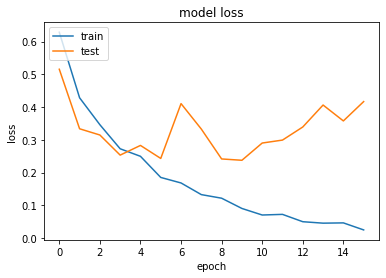

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

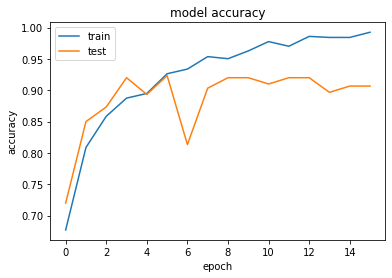

In [ ]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()